In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm, probplot
from scipy import stats
import statsmodels.api as sm
%matplotlib

C:\Users\Duarte\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Using matplotlib backend: Qt5Agg


# Projeto 3 - Qualificador de vinho

**Gabriel M Duarte**

**Beni M Stern**

## Introdução

### Objetivo

Por meio das ferramentas de machine learning da biblioteca scikit-learn do python construir um classificador de qualidade de vinho em uma escala de 0 a 10 de acordo com aspectos físicos e químicos do vinho como acidez, concentração de álcool e pH !!

### Organização

- Introdução
- Conhencendo dados
- Metodologia
- Resultados
- Conclusão

In [3]:
dataF = pd.read_csv('winequality-red.csv')
dataF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


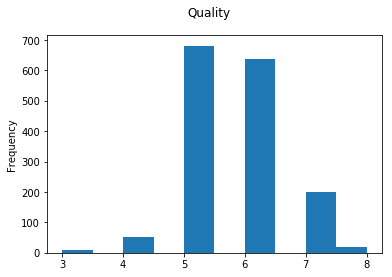

In [4]:
dataF['quality'].plot.hist()
plt.suptitle("Quality");

Com um histograma de frequência acima podemos observar que grande parte dos vinhos classificados estão entre a nota 5 ou 6 em uma escala de 0-10 o que dificulta o algoritmo a compreender como se comportam os extremos

In [61]:
dataF.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Na ultima linha da tabela de correlações acima conseguimos ver quais as variaveis que mais influenciam na qualidade 

In [62]:
dataF.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


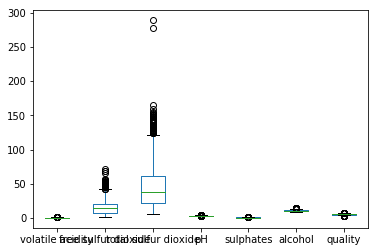

In [72]:
listop = ['volatile acidity','free sulfur dioxide','total sulfur dioxide','pH','sulphates','alcohol','quality']
dataF[listop].plot.box()

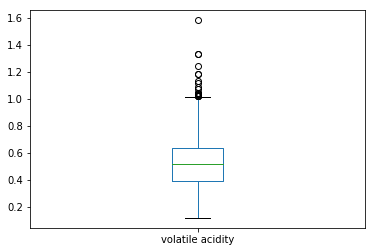

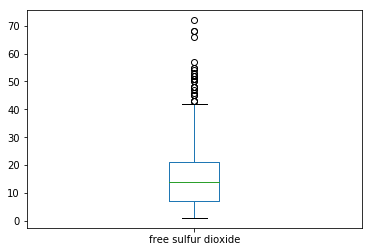

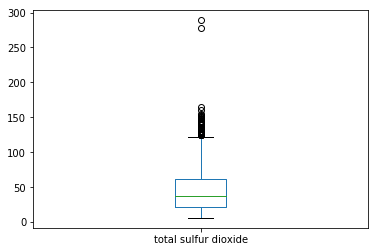

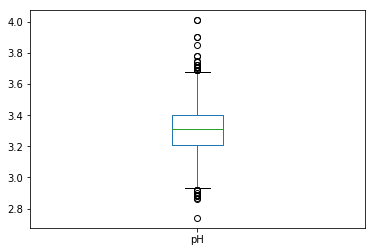

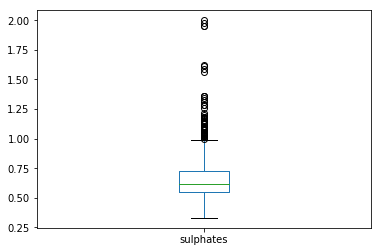

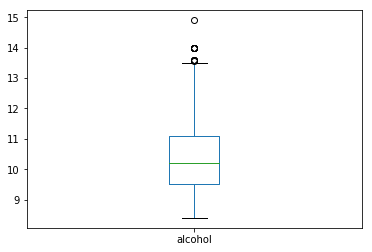

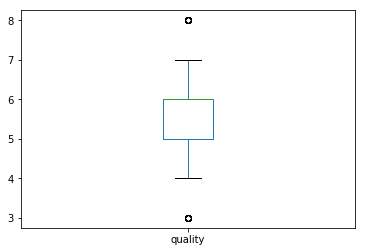

In [73]:
for i in listop:
    dataF[i].plot.box()
    plt.show()

Nos Boxplots acima escolhemos as variaveis com um valor p igual a zero para observar como estão organizados os dados mais relacionados a qualidade do vinho (obtivemos esses valores na regressão abaixo). 

Observando cada um deles podemos ver que volatile acidity, free sulfur dioxide, total sulfur dioxide, pH e sulphates possuem muitos outliers

# Metodologia

Para conseguir classificar o vinho escolhemos primeiramente a tecnica da regressão linear depois escolhemos usar RandomForest.

## Regressão Linear

Para conseguir explicar como a variavel Quality se comporta em relação as outras features, utilizamos a regressão linear, que funciona como uma equação de uma reta que tenta estimar o valor da qualidade do vinho levando em conta a distribuição de todas as features dadas.

In [50]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [51]:
y = dataF['quality']
x = dataF[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]

Antes de fazer a regressão usando a biblioteca scikit-learn utilizamos a função regress para observar alguns parametros que serão utilizados

In [52]:
results = regress(x,y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Thu, 22 Nov 2018   Prob (F-statistic):          1.79e-145
Time:                        14:19:40   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652     21.195      1.036      0.300     -19.607      63.538
fixed acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
residual sugar           0.0163      0.015      1.089      0.276      -0.013       0.046
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
free sulfur dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total sulfur dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
pH                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
sulphates                0.9163      0.114      8.014      0.000       0.692       1.141
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Resultados da regressão linear

Observamos que a acuracia do classificador esta por volta de 31% 

In [55]:
1 - mean_squared_error(y_pred,y_test) / np.var(y_test)

0.3092110067120758

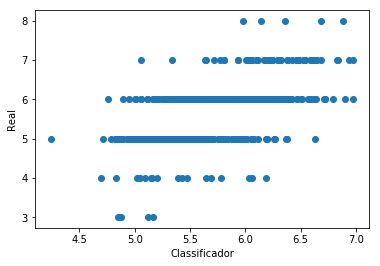

In [56]:
plt.scatter(y_pred,y_test)
plt.xlabel('Classificador')
plt.ylabel('Real')
plt.show()

## Random Forest

Tentando melhorar nossa classificação utilizamos a técnica de Random Forest que é um modelo de previsão baseado em árvore de decisões que funciona como um mapa de resultados possiveis de uma série de escolhas.

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#y_pred = np.int(y_pred)

### Resultados do random forest

Observamos que a acuracia do classificador esta por volta de 34% 

In [78]:
1 - mean_squared_error(y_pred,y_test) / np.var(y_test)

0.34278609563955365

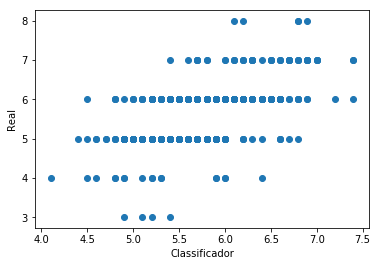

In [79]:
plt.scatter(y_pred,y_test)
plt.xlabel('Classificador')
plt.ylabel('Real')
plt.show()

## Conclusão

Nesse trabalho utilizamos alguns metodos para fazer modelos capazes de prever a qualidade de vinhos, primeiro usamos a regressão linear e obtevemos uma baixa acurácia, então para melhorar resolvemos utilizar outra ferramenta do scikit-learn o random forest
que consegui subir a acurácia em por volta de 4%.

Se tivessemos utilizado uma base de dados que gerasse uma previsão mais alta, poderiamos pensar em uma aplicação real, como uma ferramenta para produtores de vinhos saberem apenas com aspectos quimicos e fisicos a qualidade do vinho. 